In [204]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mc
import matplotlib.ticker as tck
from pathlib import Path
import functions as f
import pandas as pd

In [205]:
# set the colormap and centre the colorbar
class MidpointNormalize(mc.Normalize):
    """Normalise the colorbar."""
    def __init__(self, vmin=None, vmax=None, midpoint=None, clip=False):
        self.midpoint = midpoint
        mc.Normalize.__init__(self, vmin, vmax, clip)

    def __call__(self, value, clip=None):
        x, y = [self.vmin, self.midpoint, self.vmax], [0, 0.5, 1]
        return np.ma.masked_array(np.interp(value, x, y), np.isnan(value))

In [206]:
import os
os.environ["PATH"] += os.pathsep + '/usr/local/texlive/2021/bin/universal-darwin'
#print(os.getenv("PATH"))

plt.rcParams["mathtext.fontset"] = "cm"
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['font.family'] = 'STIXGeneral'

plt.rc('text', usetex=True)

In [207]:
case = 'perfectdisk'

In [208]:
pattern_speed = pd.read_csv(f'./../fit_pattern_speed_{case}_test.csv', delimiter=' ')

In [209]:
# pattern_speed = pd.read_csv(f'./../bigloop_results/{case}/fit_pattern_speed_{case}.csv', delimiter=' ')
# FIG_DIR = Path('./../figures/')

In [210]:
(pattern_speed['omega'] > 200).sum()

232

In [211]:
pattern_speed['diff'] = 40 - pattern_speed['omega']
pattern_speed['omega_err'] = (pattern_speed['omega_err_down'] + pattern_speed['omega_err_up']) / 2

In [198]:
# only_PAaligned = (pattern_speed['deltaPA'] == 0)
# only_notPAaligned = (pattern_speed['deltaPA'] == 1) | (pattern_speed['deltaPA'] == 1)
# one_side_psi_and_PA = (pattern_speed['psi'] < 0) & only_notPAaligned
# only_symmetrised  = (pattern_speed['sym'] == 1)# & only_PAaligned
# only_nonsymmetrised  = (pattern_speed['sym'] == 0)# & only_PAaligned
# only_prepixalated = (pattern_speed['pix'] == 1) #& only_PAaligned
# only_nonprepixalated = (pattern_speed['pix'] == 0) #& only_PAaligned
# only_precise      = (pattern_speed['uncertainties'] == 0) & only_PAaligned
only_nice_inclined = (np.rad2deg(pattern_speed['i']) > 45) & (np.rad2deg(pattern_speed['i']) < 47)
only_nice_inclined2 = (np.rad2deg(pattern_speed['i']) > 47) & (np.rad2deg(pattern_speed['i']) < 49)
# only_bar_aligned = (pattern_speed['psi'] > -30) & (pattern_speed['psi'] < 30) & only_PAaligned


In [199]:
# mask = (pattern_speed['pix'] == 0) & \
# (pattern_speed['sym'] == 1) & \
# (pattern_speed['uncertainties'] == 1) & \
# (pattern_speed['i'] != 5) & \
# (pattern_speed['deltaPA'] == 0)

In [202]:
np.rad2deg(0.836304)

47.9166895899088

KeyError: "None of [Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,\n            ...\n            1340, 1341, 1342, 1343, 1344, 1345, 1346, 1347, 1348, 1349],\n           dtype='int64', length=666)] are in the [columns]"

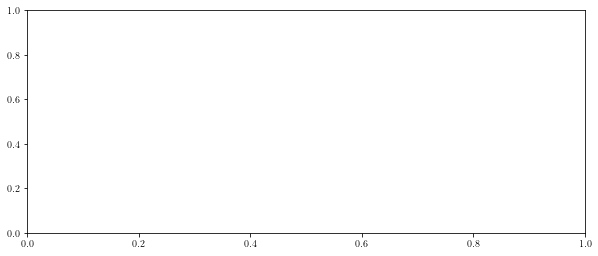

In [121]:
fig, ax = plt.subplots(figsize=(10, 4.1))

levels = np.linspace(-50, 100, 101)
norm = MidpointNormalize(-50, 100, 0.0)

sc = ax.scatter(pattern_speed[mask]['i'], pattern_speed[mask]['psi'], c=pattern_speed[mask]['diff'], 
                cmap='seismic', norm=norm, marker='s', s=570)
ax.grid(ls='dashed')
ax.tick_params(labelsize=20, direction='in')
ax.set_xlabel(r'$i\, \rm \,[^\circ]$', fontsize=20)
ax.set_ylabel(r'$\psi_{bar}\, \, [^\circ]$', fontsize=20)
ax.set_ylim(0, 90)
ax.set_xlim(0, 90)
# ax.set_aspect('1')
# ax.set_title(r'$V_{radial}$', fontsize=20)
cbar = plt.colorbar(sc, format='%g')
cbar.set_label(label=r'$\rm  \Omega_{GT} - \Omega_p \, [\ km/s/kpc]$', size=15)
plt.savefig(FIG_DIR / f'omega_diff_i_psi_{case}.png', bbox_inches='tight', dpi=300)

In [122]:
# pattern_speed = pattern_speed[pattern_speed['psi'] == 0]

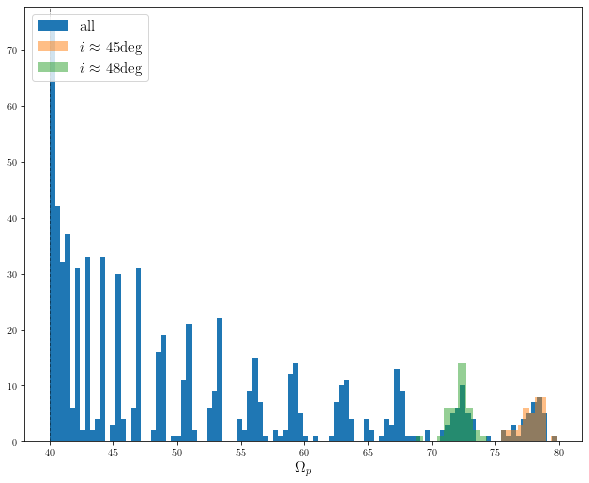

In [203]:
fig, ax = plt.subplots(figsize=(10, 8))
ax.hist(pattern_speed['omega'], bins=100, label='all')
# ax.hist(pattern_speed['omega'][only_PAaligned], bins=40, alpha=0.9, label=r'$\delta_{PA} = 0^0$')
# ax.hist(pattern_speed['omega'][only_notPAaligned], bins=40, alpha=0.5, label=r'$|\delta_{PA}| = 1^0$')
# ax.hist(pattern_speed['omega'][one_side_psi_and_PA], bins=40, alpha=0.5, label='$\psi < 0$ and $\delta_{PA} = 1^0$')
#ax.hist(pattern_speed['omega'][only_symmetrised], bins=40, alpha=1, label='symmetrized and $\delta_{PA} = 0^0$')
#ax.hist(pattern_speed['omega'][only_nonsymmetrised], bins=40, alpha=1, label='asymmetrized and $\delta_{PA} = 0^0$')
#ax.hist(pattern_speed['omega'][only_precise], bins=30, alpha=0.5, label='no uncertainties and $\delta_{PA} = 0^0$')
# ax.hist(pattern_speed['omega'][only_prepixalated], bins=40, alpha=0.5, label='prepixelated')
# ax.hist(pattern_speed['omega'][only_nonprepixalated], bins=40, alpha=0.5, label='nonprepixelated')
# ax.hist(pattern_speed['omega'][only_nice_inclined], bins=10, alpha=0.5, label=r'$i \approx$ 45deg')
# ax.hist(pattern_speed['omega'][only_nice_inclined2], bins=10, alpha=0.5, label=r'$i \approx$ 48deg')
# ax.hist(pattern_speed['omega'][only_bar_aligned], bins=40, alpha=0.5)
ax.axvline(40, c='black', ls='-.', lw=0.5)
# ax.axvline(100, c='black', ls='-.', lw=0.5)
# plt.xlim(-200, 200)
plt.xlabel(r'$\Omega_p$', fontsize=15)
plt.legend(loc='upper left', fontsize=15)
plt.savefig(f'./../histogram_{case}.png', bbox_inches='tight', dpi=300)

In [72]:
# plt.scatter(pattern_speed['i'][], pattern_speed['psi'][], c=pattern_speed['diff'])

In [167]:
mask=pattern_speed[pattern_speed['i'] < np.deg2rad(45)].index

In [168]:
pattern_speed.drop(mask, inplace=True)

In [133]:
sq_size = 130 #440 # 59

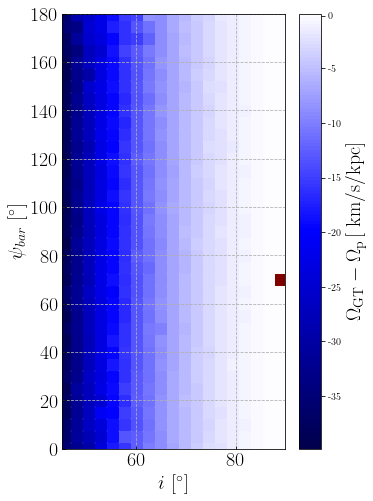

In [173]:
fig, ax = plt.subplots(figsize=(10, 8))

levels = np.linspace(np.nanmin(pattern_speed['diff']), np.nanmax(pattern_speed['diff']), 101)
norm = MidpointNormalize(np.nanmin(pattern_speed['diff']), np.nanmax(pattern_speed['diff']), 0.0)

sc = ax.scatter(np.rad2deg(pattern_speed['i']), np.rad2deg(pattern_speed['beta']), c=pattern_speed['diff'], 
                cmap='seismic', norm=norm, marker='s', s=sq_size)
ax.grid(ls='dashed')
ax.tick_params(labelsize=20, direction='in')
ax.set_xlabel(r'$i\, \rm \,[^\circ]$', fontsize=20)
ax.set_ylabel(r'$\psi_{bar}\, \, [^\circ]$', fontsize=20)
ax.set_ylim(0, 180)
ax.set_xlim(0, 90)
# ax.set_aspect('1')
# ax.set_title(r'$V_{radial}$', fontsize=20)
cbar = plt.colorbar(sc, format='%g')
cbar.set_label(label=r'$\rm  \Omega_{GT} - \Omega_p \, [\ km/s/kpc]$', size=20)

plt.savefig( f'./../omega_fit_i_beta_{case}.png', bbox_inches='tight', dpi=300)

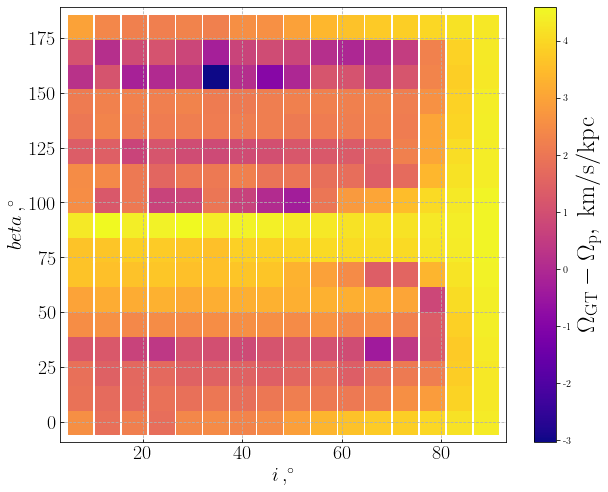

In [17]:
fig, ax = plt.subplots(figsize=(10, 8))

sc = ax.scatter(np.rad2deg(pattern_speed['i']), np.rad2deg(pattern_speed['beta']), c=pattern_speed['diff'], 
                cmap='plasma', marker='s', s=sq_size)
ax.grid(ls='dashed')
ax.tick_params(labelsize=20, direction='in')
ax.set_xlabel(r'$i\, \rm , ^\circ$', fontsize=20)
ax.set_ylabel(r'$beta\, \rm, ^\circ$', fontsize=20)
# ax.set_ylim(0, 90)
# ax.set_xlim(0, 90)
# ax.set_aspect('1')
# ax.set_title(r'$V_{radial}$', fontsize=20)
cbar = plt.colorbar(sc, format='%g')
cbar.set_label(label=r'$\rm  \Omega_{GT} - \Omega_p,  \ km/s/kpc$', size=25)
#plt.savefig(FIG_DIR / f'omega_fit_i_beta_{case}.png', bbox_inches='tight', dpi=300)


NameError: name 'FIG_DIR' is not defined

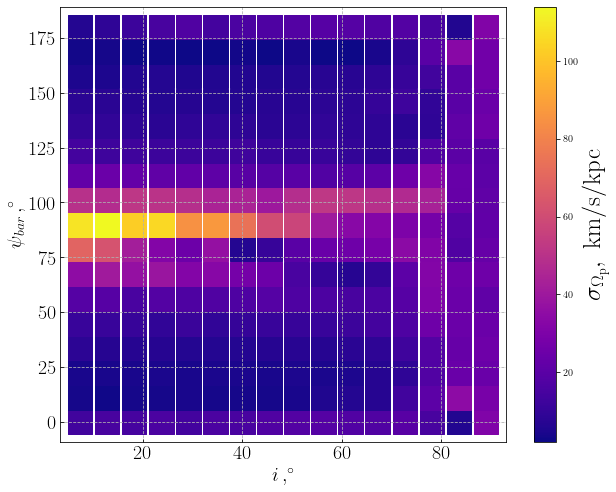

In [18]:
fig, ax = plt.subplots(figsize=(10, 8))

levels = np.linspace(np.nanmin(pattern_speed['omega_err']), np.nanmax(pattern_speed['omega_err']), 101)
sc = ax.scatter(np.rad2deg(pattern_speed['i']), np.rad2deg(pattern_speed['beta']), c=pattern_speed['omega_err'], 
                cmap='plasma', marker='s', s=sq_size)
ax.grid(ls='dashed')
ax.tick_params(labelsize=20, direction='in')
ax.set_xlabel(r'$i\, \rm , ^\circ$', fontsize=20)
ax.set_ylabel(r'$\psi_{bar}\, \rm, ^\circ$', fontsize=20)
# ax.set_ylim(0, 90)
# ax.set_xlim(0, 90)
# ax.set_aspect('1')
# ax.set_title(r'$V_{radial}$', fontsize=20)
cbar = plt.colorbar(sc, format='%g')
cbar.set_label(label=r'$\rm \sigma_{\Omega_p},  \ km/s/kpc$', size=25)
plt.savefig(FIG_DIR / f'omega_err_fit_i_beta_{case}.png', bbox_inches='tight', dpi=300)

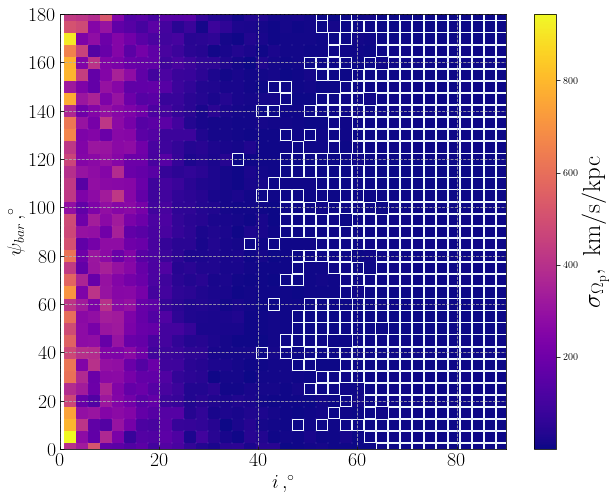

In [163]:
mask_err = pattern_speed['omega_err'] < 3
# mask_abs = (pattern_speed['omega'] < 45) & (pattern_speed['omega'] > 35)

fig, ax = plt.subplots(figsize=(10, 8))

levels = np.linspace(np.nanmin(pattern_speed['omega_err']), np.nanmax(pattern_speed['omega_err']), 101)
sc = ax.scatter(np.rad2deg(pattern_speed['i']), np.rad2deg(pattern_speed['beta']), c=pattern_speed['omega_err'], 
                cmap='plasma', marker='s', s=sq_size)

ax.scatter(np.rad2deg(pattern_speed['i'][mask_err]), np.rad2deg(pattern_speed['beta'][mask_err]), c="None", 
                edgecolors='aliceblue', marker='s', s=sq_size)

# ax.scatter(np.rad2deg(pattern_speed['i'][mask_abs]), np.rad2deg(pattern_speed['beta'][mask_abs]), c='aliceblue', s=10)

ax.grid(ls='dashed')
ax.tick_params(labelsize=20, direction='in')
ax.set_xlabel(r'$i\, \rm , ^\circ$', fontsize=20)
ax.set_ylabel(r'$\psi_{bar}\, \rm, ^\circ$', fontsize=20)
ax.set_ylim(0, 180)
ax.set_xlim(0, 90)
# ax.set_aspect('1')
# ax.set_title(r'$V_{radial}$', fontsize=20)
cbar = plt.colorbar(sc, format='%g')
cbar.set_label(label=r'$\rm \sigma_{\Omega_p},  \ km/s/kpc$', size=25)
plt.savefig(f'./../omega_err_fit_i_beta_{case}.png', bbox_inches='tight', dpi=300)

In [165]:
pattern_speed['omega_dev_err'] = abs(pattern_speed['diff']) / pattern_speed['omega_err']

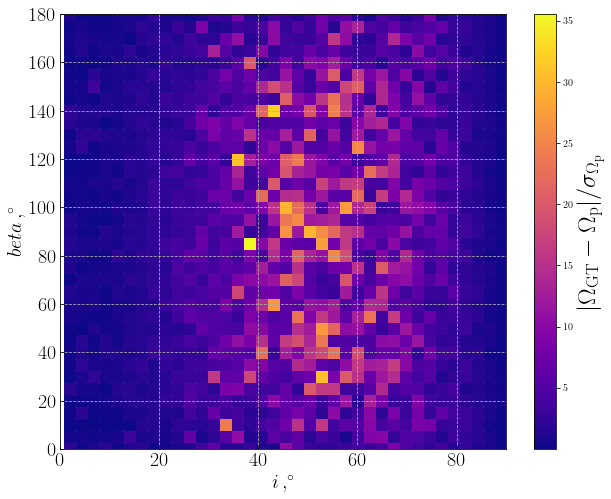

In [166]:
fig, ax = plt.subplots(figsize=(10, 8))

levels = np.linspace(np.nanmin(pattern_speed['omega_dev_err']), np.nanmax(pattern_speed['omega_dev_err']), 101)
sc = ax.scatter(np.rad2deg(pattern_speed['i']), np.rad2deg(pattern_speed['beta']), c=pattern_speed['omega_dev_err'], 
                cmap='plasma', marker='s', s=sq_size)
ax.grid(ls='dashed')
ax.tick_params(labelsize=20, direction='in')
ax.set_xlabel(r'$i\, \rm , ^\circ$', fontsize=20)
ax.set_ylabel(r'$beta\, \rm, ^\circ$', fontsize=20)
ax.set_ylim(0, 180)
ax.set_xlim(0, 90)
# ax.set_aspect('1')
# ax.set_title(r'$V_{radial}$', fontsize=20)
cbar = plt.colorbar(sc, format='%g')
cbar.set_label(label=r'$\rm  |\Omega_{GT} - \Omega_p| / \sigma_{\Omega_p}$', size=25)
plt.savefig(f'./../omega_dev_err_fit_i_beta_{case}.png', bbox_inches='tight', dpi=300)

In [82]:
pattern_speed['significance'] = abs(pattern_speed['diff']) - pattern_speed['omega_err']

mask = pattern_speed['significance'] < 0
pattern_speed['significance'][mask] = 0

In [215]:

levels = np.linspace(np.nanmin(pattern_speed['significance']), np.nanmax(pattern_speed['significance']), 101)
norm = MidpointNormalize(np.nanmin(pattern_speed['significance']), np.nanmax(pattern_speed['significance']), 0.)

$$  X(\omega) = \begin{cases} 
|40 - \Omega_p|- \Delta \Omega_p ,& |40 - \Omega_p| > \Delta \Omega_p\\
0 ,& |40 - \Omega_p| < \Delta \Omega_p
\end{cases}
 $$

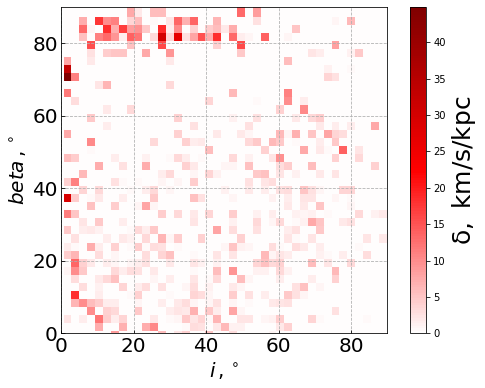

In [216]:
fig, ax = plt.subplots(figsize=(8, 6))
sc = ax.scatter(np.rad2deg(pattern_speed['i']), np.rad2deg(pattern_speed['beta']), c=pattern_speed['significance'], 
                cmap='seismic', norm=norm, marker='s', s=sq_size)
ax.grid(ls='dashed')
ax.tick_params(labelsize=20, direction='in')
ax.set_xlabel(r'$i\, \rm , ^\circ$', fontsize=20)
ax.set_ylabel(r'$beta\, \rm, ^\circ$', fontsize=20)
ax.set_ylim(0, 90)
ax.set_xlim(0, 90)
ax.set_aspect('1')
cbar = plt.colorbar(sc, format='%g')
cbar.set_label(label=r'$\rm \delta,  \ km/s/kpc$', size=25)
plt.savefig(FIG_DIR / f'omega_signif_fit_i_beta.png', bbox_inches='tight', dpi=300)